## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Import dataset

In [2]:
from keras.datasets import mnist

In [18]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [19]:
X_train.shape

(60000, 28, 28)

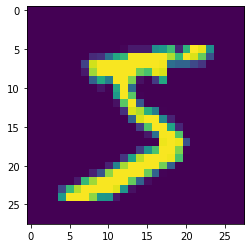

In [25]:
plt.imshow(X_train[0]) # cmap='gray_r'

In [9]:
y_train.shape

(60000,)

In [22]:
y_train[0]

5

## Normalize the X data

In [28]:
X_train.max()

255

In [29]:
X_train.min()

0

In [30]:
X_train = X_train /255
X_test = X_test /255

In [31]:
X_test.max()

1.0

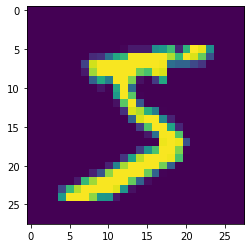

In [32]:
plt.imshow(X_train[0])

## one hot encoding the label data

In [34]:
from keras.utils import to_categorical

In [33]:
y_train[0]

5

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Reshape the data

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
# first way 
X_train = X_train.reshape(60000, 28, 28,1)

In [41]:
X_train.shape

(60000, 28, 28, 1)

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
# second way
X_test = np.expand_dims(X_test,axis=-1)

In [44]:
X_test.shape

(10000, 28, 28, 1)

## Train the model

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop'
             ,loss='categorical_crossentropy'
             ,metrics = ['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 149,418
Trainable params: 149,418
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1779 - accuracy: 0.9461
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0586 - accuracy: 0.9818


In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0442 - accuracy: 0.9852


[0.04417788237333298, 0.9851999878883362]

In [64]:
y_pred = model.predict_classes(X_test)

/home/programmer/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [63]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [61]:
y_pred[0]

7

In [69]:
y_real = np.argmax(y_test, axis=-1) # convert one hot encoding into label encoding

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_real,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

